<a href="https://colab.research.google.com/github/shsangi/sheeraz_blogs/blob/main/FIFA_data_analysis_winners_official_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIFA World Cups (Sample Work for learners to get started with data, output may not be shown correctly with emojis on colab and ignore warning!)



---


FIFA World Cup Winners Analysis with Flags
This notebook analyzes the FIFA World Cup dataset and adds flags to country names in all relevant columns, including `Venue Country`.


**Step 1: Import Libraries**
Import necessary libraries for data analysis and visualization.

In [4]:
pip install emoji

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from emoji import emojize

Step 2: Load the Data
Load the dataset into a Pandas DataFrame.

In [6]:
# Your dataset
data = {
    "SrNo": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
    "Winner": ["Uruguay", "Italy", "Italy", "Uruguay", "West Germany", "Brazil", "Brazil", "England", "Brazil", "West Germany", "Argentina", "Italy", "Argentina", "West Germany", "Brazil", "France", "Brazil", "Italy", "Spain", "Germany", "France", "Argentina"],
    "Loser": ["Argentina", "Czechoslovakia", "Hungary", "Brazil", "Hungary", "Sweden", "Czechoslovakia", "West Germany", "Italy", "Netherlands", "Netherlands", "West Germany", "West Germany", "Argentina", "Italy", "Brazil", "Germany", "France", "Netherlands", "Argentina", "Croatia", "France"],
    "Year": [1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018, 2022],
    "Venue Country": ["Uruguay", "Italy", "France", "Brazil", "Switzerland", "Sweden", "Chile", "England", "Mexico", "West Germany", "Argentina", "Spain", "Mexico", "Italy", "United States", "France", "South Korea & Japan", "Germany", "South Africa", "Brazil", "Russia", "Qatar"],
    "Total Teams": [13, 16, 15, 13, 16, 16, 16, 16, 16, 16, 16, 24, 24, 24, 24, 32, 32, 32, 32, 32, 32, 32],
    "Total Matches": [18, 17, 18, 22, 26, 35, 32, 32, 32, 38, 38, 52, 52, 52, 52, 64, 64, 64, 64, 64, 64, 64],
    "Teams Participated": [
        # 1930
        ["Argentina", "Bolivia", "Brazil", "Chile", "France", "Mexico", "Paraguay", "Peru", "Romania", "United States", "Uruguay", "Belgium", "Yugoslavia"],
        # 1934
        ["Argentina", "Austria", "Belgium", "Brazil", "Czechoslovakia", "Egypt", "France", "Germany", "Hungary", "Italy", "Netherlands", "Romania", "Spain", "Sweden", "Switzerland", "United States"],
        # 1938
        ["Belgium", "Brazil", "Cuba", "Czechoslovakia", "Dutch East Indies", "France", "Germany", "Hungary", "Italy", "Netherlands", "Norway", "Poland", "Romania", "Sweden", "Switzerland"],
        # 1950
        ["Bolivia", "Brazil", "Chile", "England", "Italy", "Mexico", "Paraguay", "Spain", "Sweden", "Switzerland", "United States", "Uruguay", "Yugoslavia"],
        # 1954
        ["Austria", "Belgium", "Brazil", "Czechoslovakia", "England", "France", "Hungary", "Italy", "Mexico", "Scotland", "South Korea", "Switzerland", "Turkey", "Uruguay", "West Germany", "Yugoslavia"],
        # 1958
        ["Argentina", "Austria", "Brazil", "Czechoslovakia", "England", "France", "Hungary", "Mexico", "Northern Ireland", "Paraguay", "Scotland", "Sweden", "Soviet Union", "Wales", "West Germany", "Yugoslavia"],
        # 1962
        ["Argentina", "Brazil", "Bulgaria", "Chile", "Colombia", "Czechoslovakia", "England", "Hungary", "Italy", "Mexico", "Spain", "Switzerland", "Uruguay", "Soviet Union", "West Germany", "Yugoslavia"],
        # 1966
        ["Argentina", "Brazil", "Bulgaria", "Chile", "England", "France", "Hungary", "Italy", "Mexico", "North Korea", "Portugal", "Spain", "Switzerland", "Uruguay", "Soviet Union", "West Germany"],
        # 1970
        ["Belgium", "Brazil", "Czechoslovakia", "El Salvador", "England", "Israel", "Italy", "Mexico", "Morocco", "Peru", "Romania", "Sweden", "Uruguay", "Soviet Union", "West Germany"],
        # 1974
        ["Australia", "Austria", "Brazil", "Bulgaria", "Chile", "East Germany", "Haiti", "Italy", "Netherlands", "Poland", "Scotland", "Sweden", "Uruguay", "West Germany", "Yugoslavia"],
        # 1978
        ["Argentina", "Austria", "Brazil", "France", "Hungary", "Iran", "Italy", "Mexico", "Netherlands", "Peru", "Poland", "Scotland", "Spain", "Sweden", "Tunisia", "West Germany"],
        # 1982
        ["Algeria", "Argentina", "Austria", "Belgium", "Brazil", "Cameroon", "Chile", "Czechoslovakia", "El Salvador", "England", "France", "Honduras", "Hungary", "Italy", "Kuwait", "New Zealand", "Northern Ireland", "Peru", "Poland", "Scotland", "Spain", "Soviet Union", "West Germany", "Yugoslavia"],
        # 1986
        ["Algeria", "Argentina", "Belgium", "Brazil", "Bulgaria", "Canada", "Denmark", "England", "France", "Hungary", "Iraq", "Italy", "Mexico", "Morocco", "Northern Ireland", "Paraguay", "Poland", "Portugal", "Scotland", "South Korea", "Spain", "Soviet Union", "Uruguay", "West Germany"],
        # 1990
        ["Argentina", "Austria", "Belgium", "Brazil", "Cameroon", "Colombia", "Costa Rica", "Czechoslovakia", "Egypt", "England", "Ireland", "Italy", "Netherlands", "Romania", "Scotland", "South Korea", "Spain", "Sweden", "United Arab Emirates", "United States", "Uruguay", "West Germany", "Yugoslavia"],
        # 1994
        ["Argentina", "Belgium", "Bolivia", "Brazil", "Bulgaria", "Cameroon", "Colombia", "Costa Rica", "Germany", "Greece", "Italy", "Mexico", "Morocco", "Netherlands", "Nigeria", "Norway", "Republic of Ireland", "Romania", "Russia", "Saudi Arabia", "South Korea", "Spain", "Sweden", "Switzerland", "United States"],
        # 1998
        ["Argentina", "Austria", "Belgium", "Brazil", "Chile", "Colombia", "Croatia", "Denmark", "England", "France", "Germany", "Iran", "Italy", "Jamaica", "Japan", "Mexico", "Morocco", "Netherlands", "Nigeria", "Norway", "Paraguay", "Romania", "Scotland", "South Africa", "South Korea", "Spain", "Tunisia", "United States", "Yugoslavia"],
        # 2002
        ["Argentina", "Belgium", "Brazil", "China", "Costa Rica", "Croatia", "Denmark", "Ecuador", "England", "France", "Germany", "Ireland", "Italy", "Japan", "Mexico", "Nigeria", "Paraguay", "Poland", "Portugal", "Russia", "Saudi Arabia", "Senegal", "Slovenia", "South Africa", "South Korea", "Spain", "Sweden", "Tunisia", "Turkey", "United States", "Uruguay"],
        # 2006
        ["Angola", "Argentina", "Australia", "Brazil", "Costa Rica", "Côte d'Ivoire", "Croatia", "Czech Republic", "Ecuador", "England", "France", "Germany", "Ghana", "Iran", "Italy", "Japan", "Mexico", "Netherlands", "Paraguay", "Poland", "Portugal", "Saudi Arabia", "Serbia and Montenegro", "South Korea", "Spain", "Sweden", "Switzerland", "Togo", "Trinidad and Tobago", "Tunisia", "Ukraine", "United States"],
        # 2010
        ["Algeria", "Argentina", "Australia", "Brazil", "Cameroon", "Chile", "Denmark", "England", "France", "Germany", "Ghana", "Greece", "Honduras", "Italy", "Ivory Coast", "Japan", "Mexico", "Netherlands", "New Zealand", "Nigeria", "North Korea", "Paraguay", "Portugal", "Serbia", "Slovakia", "Slovenia", "South Africa", "South Korea", "Spain", "Switzerland", "Uruguay", "United States"],
        # 2014
        ["Algeria", "Argentina", "Australia", "Belgium", "Bosnia and Herzegovina", "Brazil", "Cameroon", "Chile", "Colombia", "Costa Rica", "Croatia", "Ecuador", "England", "France", "Germany", "Ghana", "Greece", "Honduras", "Iran", "Italy", "Ivory Coast", "Japan", "Mexico", "Netherlands", "Nigeria", "Portugal", "Russia", "South Korea", "Spain", "Switzerland", "United States", "Uruguay"],
        # 2018
        ["Argentina", "Australia", "Belgium", "Brazil", "Colombia", "Costa Rica", "Croatia", "Denmark", "Egypt", "England", "France", "Germany", "Iceland", "Iran", "Japan", "Mexico", "Morocco", "Nigeria", "Panama", "Peru", "Poland", "Portugal", "Russia", "Saudi Arabia", "Senegal", "Serbia", "South Korea", "Spain", "Sweden", "Switzerland", "Tunisia", "Uruguay"],
        # 2022
        ["Argentina", "Australia", "Belgium", "Brazil", "Cameroon", "Canada", "Costa Rica", "Croatia", "Denmark", "Ecuador", "England", "France", "Germany", "Ghana", "Iran", "Japan", "Mexico", "Morocco", "Netherlands", "Poland", "Portugal", "Qatar", "Saudi Arabia", "Senegal", "Serbia", "South Korea", "Spain", "Switzerland", "Tunisia", "United States", "Uruguay", "Wales"]
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows
df.head()

,SrNo,Winner,Loser,Year,Venue Country,Total Teams,Total Matches,Teams Participated
0,1,Uruguay,Argentina,1930,Uruguay,13,18,"[Argentina, Bolivia, Brazil, Chile, France, Me..."
1,2,Italy,Czechoslovakia,1934,Italy,16,17,"[Argentina, Austria, Belgium, Brazil, Czechosl..."
2,3,Italy,Hungary,1938,France,15,18,"[Belgium, Brazil, Cuba, Czechoslovakia, Dutch ..."
3,4,Uruguay,Brazil,1950,Brazil,13,22,"[Bolivia, Brazil, Chile, England, Italy, Mexic..."
4,5,West Germany,Hungary,1954,Switzerland,16,26,"[Austria, Belgium, Brazil, Czechoslovakia, Eng..."


Step 3: Add Flags to Country Names

In [7]:
# Mapping of country names to flag emojis
country_to_flag = {
    "Uruguay": "🇺🇾",
    "Italy": "🇮🇹",
    "West Germany": "🇩🇪",
    "Brazil": "🇧🇷",
    "England": "🏴󠁧󠁢󠁥󠁮󠁧󠁿",
    "Argentina": "🇦🇷",
    "France": "🇫🇷",
    "Spain": "🇪🇸",
    "Germany": "🇩🇪",
    "Czechoslovakia": "🇨🇿",
    "Hungary": "🇭🇺",
    "Sweden": "🇸🇪",
    "Netherlands": "🇳🇱",
    "Croatia": "🇭🇷",
    "Belgium": "🇧🇪",
    "Yugoslavia": "🇷🇸",
    "Austria": "🇦🇹",
    "Egypt": "🇪🇬",
    "Switzerland": "🇨🇭",
    "United States": "🇺🇸",
    "Mexico": "🇲🇽",
    "Paraguay": "🇵🇾",
    "Peru": "🇵🇪",
    "Romania": "🇷🇴",
    "Chile": "🇨🇱",
    "Bolivia": "🇧🇴",
    "Scotland": "🏴󠁧󠁢󠁳󠁣󠁴󠁿",
    "Turkey": "🇹🇷",
    "South Korea": "🇰🇷",
    "Soviet Union": "🇷🇺",
    "Wales": "🏴󠁧󠁢󠁷󠁬󠁳󠁿",
    "Portugal": "🇵🇹",
    "Iran": "🇮🇷",
    "Japan": "🇯🇵",
    "Morocco": "🇲🇦",
    "Tunisia": "🇹🇳",
    "Algeria": "🇩🇿",
    "Cameroon": "🇨🇲",
    "Colombia": "🇨🇴",
    "Costa Rica": "🇨🇷",
    "Ecuador": "🇪🇨",
    "Ghana": "🇬🇭",
    "Greece": "🇬🇷",
    "Honduras": "🇭🇳",
    "Iceland": "🇮🇸",
    "Ivory Coast": "🇨🇮",
    "Nigeria": "🇳🇬",
    "Panama": "🇵🇦",
    "Poland": "🇵🇱",
    "Qatar": "🇶🇦",
    "Russia": "🇷🇺",
    "Saudi Arabia": "🇸🇦",
    "Senegal": "🇸🇳",
    "Serbia": "🇷🇸",
    "Slovakia": "🇸🇰",
    "Slovenia": "🇸🇮",
    "South Africa": "🇿🇦",
    "Trinidad and Tobago": "🇹🇹",
    "Ukraine": "🇺🇦",
    "United Arab Emirates": "🇦🇪",
    "Wales": "🏴󠁧󠁢󠁷󠁬󠁳󠁿",
    "South Korea & Japan": "🇰🇷🇯🇵",
    "South Africa": "🇿🇦",
    "Qatar": "🇶🇦",
}

# Function to add flags to country names
def add_flag(country):
    return f"{country_to_flag.get(country, '🏳️')} {country}"

# Apply the function to the 'Winner', 'Loser', and 'Venue Country' columns
df['Winner'] = df['Winner'].apply(add_flag)
df['Loser'] = df['Loser'].apply(add_flag)
df['Venue Country'] = df['Venue Country'].apply(add_flag)

# Apply the function to the 'Teams Participated' column
df['Teams Participated'] = df['Teams Participated'].apply(lambda teams: [add_flag(team) for team in teams])

# Display the updated DataFrame
df.head()

,SrNo,Winner,Loser,Year,Venue Country,Total Teams,Total Matches,Teams Participated
0,1,🇺🇾 Uruguay,🇦🇷 Argentina,1930,🇺🇾 Uruguay,13,18,"[🇦🇷 Argentina, 🇧🇴 Bolivia, 🇧🇷 Brazil, 🇨🇱 Chile..."
1,2,🇮🇹 Italy,🇨🇿 Czechoslovakia,1934,🇮🇹 Italy,16,17,"[🇦🇷 Argentina, 🇦🇹 Austria, 🇧🇪 Belgium, 🇧🇷 Braz..."
2,3,🇮🇹 Italy,🇭🇺 Hungary,1938,🇫🇷 France,15,18,"[🇧🇪 Belgium, 🇧🇷 Brazil, 🏳️ Cuba, 🇨🇿 Czechoslov..."
3,4,🇺🇾 Uruguay,🇧🇷 Brazil,1950,🇧🇷 Brazil,13,22,"[🇧🇴 Bolivia, 🇧🇷 Brazil, 🇨🇱 Chile, 🏴󠁧󠁢󠁥󠁮󠁧󠁿 Engl..."
4,5,🇩🇪 West Germany,🇭🇺 Hungary,1954,🇨🇭 Switzerland,16,26,"[🇦🇹 Austria, 🇧🇪 Belgium, 🇧🇷 Brazil, 🇨🇿 Czechos..."


In [8]:
# %% [markdown]
# # FIFA World Cup Winners Analysis with Flags
# This notebook analyzes the FIFA World Cup dataset and adds flags to country names in all relevant columns, including `Venue Country`.

# %% [markdown]
# ## Step 1: Import Libraries
# Import necessary libraries for data analysis and visualization.

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from emoji import emojize

# %% [markdown]
# ## Step 2: Load the Data
# Load the dataset into a Pandas DataFrame.

# %%
# Your dataset
data = {
    "SrNo": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
    "Winner": ["Uruguay", "Italy", "Italy", "Uruguay", "West Germany", "Brazil", "Brazil", "England", "Brazil", "West Germany", "Argentina", "Italy", "Argentina", "West Germany", "Brazil", "France", "Brazil", "Italy", "Spain", "Germany", "France", "Argentina"],
    "Loser": ["Argentina", "Czechoslovakia", "Hungary", "Brazil", "Hungary", "Sweden", "Czechoslovakia", "West Germany", "Italy", "Netherlands", "Netherlands", "West Germany", "West Germany", "Argentina", "Italy", "Brazil", "Germany", "France", "Netherlands", "Argentina", "Croatia", "France"],
    "Year": [1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018, 2022],
    "Venue Country": ["Uruguay", "Italy", "France", "Brazil", "Switzerland", "Sweden", "Chile", "England", "Mexico", "West Germany", "Argentina", "Spain", "Mexico", "Italy", "United States", "France", "South Korea & Japan", "Germany", "South Africa", "Brazil", "Russia", "Qatar"],
    "Total Teams": [13, 16, 15, 13, 16, 16, 16, 16, 16, 16, 16, 24, 24, 24, 24, 32, 32, 32, 32, 32, 32, 32],
    "Total Matches": [18, 17, 18, 22, 26, 35, 32, 32, 32, 38, 38, 52, 52, 52, 52, 64, 64, 64, 64, 64, 64, 64],
    "Teams Participated": [
        # 1930
        ["Argentina", "Bolivia", "Brazil", "Chile", "France", "Mexico", "Paraguay", "Peru", "Romania", "United States", "Uruguay", "Belgium", "Yugoslavia"],
        # 1934
        ["Argentina", "Austria", "Belgium", "Brazil", "Czechoslovakia", "Egypt", "France", "Germany", "Hungary", "Italy", "Netherlands", "Romania", "Spain", "Sweden", "Switzerland", "United States"],
        # 1938
        ["Belgium", "Brazil", "Cuba", "Czechoslovakia", "Dutch East Indies", "France", "Germany", "Hungary", "Italy", "Netherlands", "Norway", "Poland", "Romania", "Sweden", "Switzerland"],
        # 1950
        ["Bolivia", "Brazil", "Chile", "England", "Italy", "Mexico", "Paraguay", "Spain", "Sweden", "Switzerland", "United States", "Uruguay", "Yugoslavia"],
        # 1954
        ["Austria", "Belgium", "Brazil", "Czechoslovakia", "England", "France", "Hungary", "Italy", "Mexico", "Scotland", "South Korea", "Switzerland", "Turkey", "Uruguay", "West Germany", "Yugoslavia"],
        # 1958
        ["Argentina", "Austria", "Brazil", "Czechoslovakia", "England", "France", "Hungary", "Mexico", "Northern Ireland", "Paraguay", "Scotland", "Sweden", "Soviet Union", "Wales", "West Germany", "Yugoslavia"],
        # 1962
        ["Argentina", "Brazil", "Bulgaria", "Chile", "Colombia", "Czechoslovakia", "England", "Hungary", "Italy", "Mexico", "Spain", "Switzerland", "Uruguay", "Soviet Union", "West Germany", "Yugoslavia"],
        # 1966
        ["Argentina", "Brazil", "Bulgaria", "Chile", "England", "France", "Hungary", "Italy", "Mexico", "North Korea", "Portugal", "Spain", "Switzerland", "Uruguay", "Soviet Union", "West Germany"],
        # 1970
        ["Belgium", "Brazil", "Czechoslovakia", "El Salvador", "England", "Israel", "Italy", "Mexico", "Morocco", "Peru", "Romania", "Sweden", "Uruguay", "Soviet Union", "West Germany"],
        # 1974
        ["Australia", "Austria", "Brazil", "Bulgaria", "Chile", "East Germany", "Haiti", "Italy", "Netherlands", "Poland", "Scotland", "Sweden", "Uruguay", "West Germany", "Yugoslavia"],
        # 1978
        ["Argentina", "Austria", "Brazil", "France", "Hungary", "Iran", "Italy", "Mexico", "Netherlands", "Peru", "Poland", "Scotland", "Spain", "Sweden", "Tunisia", "West Germany"],
        # 1982
        ["Algeria", "Argentina", "Austria", "Belgium", "Brazil", "Cameroon", "Chile", "Czechoslovakia", "El Salvador", "England", "France", "Honduras", "Hungary", "Italy", "Kuwait", "New Zealand", "Northern Ireland", "Peru", "Poland", "Scotland", "Spain", "Soviet Union", "West Germany", "Yugoslavia"],
        # 1986
        ["Algeria", "Argentina", "Belgium", "Brazil", "Bulgaria", "Canada", "Denmark", "England", "France", "Hungary", "Iraq", "Italy", "Mexico", "Morocco", "Northern Ireland", "Paraguay", "Poland", "Portugal", "Scotland", "South Korea", "Spain", "Soviet Union", "Uruguay", "West Germany"],
        # 1990
        ["Argentina", "Austria", "Belgium", "Brazil", "Cameroon", "Colombia", "Costa Rica", "Czechoslovakia", "Egypt", "England", "Ireland", "Italy", "Netherlands", "Romania", "Scotland", "South Korea", "Spain", "Sweden", "United Arab Emirates", "United States", "Uruguay", "West Germany", "Yugoslavia"],
        # 1994
        ["Argentina", "Belgium", "Bolivia", "Brazil", "Bulgaria", "Cameroon", "Colombia", "Costa Rica", "Germany", "Greece", "Italy", "Mexico", "Morocco", "Netherlands", "Nigeria", "Norway", "Republic of Ireland", "Romania", "Russia", "Saudi Arabia", "South Korea", "Spain", "Sweden", "Switzerland", "United States"],
        # 1998
        ["Argentina", "Austria", "Belgium", "Brazil", "Chile", "Colombia", "Croatia", "Denmark", "England", "France", "Germany", "Iran", "Italy", "Jamaica", "Japan", "Mexico", "Morocco", "Netherlands", "Nigeria", "Norway", "Paraguay", "Romania", "Scotland", "South Africa", "South Korea", "Spain", "Tunisia", "United States", "Yugoslavia"],
        # 2002
        ["Argentina", "Belgium", "Brazil", "China", "Costa Rica", "Croatia", "Denmark", "Ecuador", "England", "France", "Germany", "Ireland", "Italy", "Japan", "Mexico", "Nigeria", "Paraguay", "Poland", "Portugal", "Russia", "Saudi Arabia", "Senegal", "Slovenia", "South Africa", "South Korea", "Spain", "Sweden", "Tunisia", "Turkey", "United States", "Uruguay"],
        # 2006
        ["Angola", "Argentina", "Australia", "Brazil", "Costa Rica", "Côte d'Ivoire", "Croatia", "Czech Republic", "Ecuador", "England", "France", "Germany", "Ghana", "Iran", "Italy", "Japan", "Mexico", "Netherlands", "Paraguay", "Poland", "Portugal", "Saudi Arabia", "Serbia and Montenegro", "South Korea", "Spain", "Sweden", "Switzerland", "Togo", "Trinidad and Tobago", "Tunisia", "Ukraine", "United States"],
        # 2010
        ["Algeria", "Argentina", "Australia", "Brazil", "Cameroon", "Chile", "Denmark", "England", "France", "Germany", "Ghana", "Greece", "Honduras", "Italy", "Ivory Coast", "Japan", "Mexico", "Netherlands", "New Zealand", "Nigeria", "North Korea", "Paraguay", "Portugal", "Serbia", "Slovakia", "Slovenia", "South Africa", "South Korea", "Spain", "Switzerland", "Uruguay", "United States"],
        # 2014
        ["Algeria", "Argentina", "Australia", "Belgium", "Bosnia and Herzegovina", "Brazil", "Cameroon", "Chile", "Colombia", "Costa Rica", "Croatia", "Ecuador", "England", "France", "Germany", "Ghana", "Greece", "Honduras", "Iran", "Italy", "Ivory Coast", "Japan", "Mexico", "Netherlands", "Nigeria", "Portugal", "Russia", "South Korea", "Spain", "Switzerland", "United States", "Uruguay"],
        # 2018
        ["Argentina", "Australia", "Belgium", "Brazil", "Colombia", "Costa Rica", "Croatia", "Denmark", "Egypt", "England", "France", "Germany", "Iceland", "Iran", "Japan", "Mexico", "Morocco", "Nigeria", "Panama", "Peru", "Poland", "Portugal", "Russia", "Saudi Arabia", "Senegal", "Serbia", "South Korea", "Spain", "Sweden", "Switzerland", "Tunisia", "Uruguay"],
        # 2022
        ["Argentina", "Australia", "Belgium", "Brazil", "Cameroon", "Canada", "Costa Rica", "Croatia", "Denmark", "Ecuador", "England", "France", "Germany", "Ghana", "Iran", "Japan", "Mexico", "Morocco", "Netherlands", "Poland", "Portugal", "Qatar", "Saudi Arabia", "Senegal", "Serbia", "South Korea", "Spain", "Switzerland", "Tunisia", "United States", "Uruguay", "Wales"]
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows
df.head()

# %% [markdown]
# ## Step 3: Add Flags to Country Names
# Use the `emoji` library to prepend flags to country names in all relevant columns, including `Venue Country`.

# %%
# Mapping of country names to flag emojis
country_to_flag = {
    "Uruguay": "🇺🇾",
    "Italy": "🇮🇹",
    "West Germany": "🇩🇪",
    "Brazil": "🇧🇷",
    "England": "🏴󠁧󠁢󠁥󠁮󠁧󠁿",
    "Argentina": "🇦🇷",
    "France": "🇫🇷",
    "Spain": "🇪🇸",
    "Germany": "🇩🇪",
    "Czechoslovakia": "🇨🇿",
    "Hungary": "🇭🇺",
    "Sweden": "🇸🇪",
    "Netherlands": "🇳🇱",
    "Croatia": "🇭🇷",
    "Belgium": "🇧🇪",
    "Yugoslavia": "🇷🇸",
    "Austria": "🇦🇹",
    "Egypt": "🇪🇬",
    "Switzerland": "🇨🇭",
    "United States": "🇺🇸",
    "Mexico": "🇲🇽",
    "Paraguay": "🇵🇾",
    "Peru": "🇵🇪",
    "Romania": "🇷🇴",
    "Chile": "🇨🇱",
    "Bolivia": "🇧🇴",
    "Scotland": "🏴󠁧󠁢󠁳󠁣󠁴󠁿",
    "Turkey": "🇹🇷",
    "South Korea": "🇰🇷",
    "Soviet Union": "🇷🇺",
    "Wales": "🏴󠁧󠁢󠁷󠁬󠁳󠁿",
    "Portugal": "🇵🇹",
    "Iran": "🇮🇷",
    "Japan": "🇯🇵",
    "Morocco": "🇲🇦",
    "Tunisia": "🇹🇳",
    "Algeria": "🇩🇿",
    "Cameroon": "🇨🇲",
    "Colombia": "🇨🇴",
    "Costa Rica": "🇨🇷",
    "Ecuador": "🇪🇨",
    "Ghana": "🇬🇭",
    "Greece": "🇬🇷",
    "Honduras": "🇭🇳",
    "Iceland": "🇮🇸",
    "Ivory Coast": "🇨🇮",
    "Nigeria": "🇳🇬",
    "Panama": "🇵🇦",
    "Poland": "🇵🇱",
    "Qatar": "🇶🇦",
    "Russia": "🇷🇺",
    "Saudi Arabia": "🇸🇦",
    "Senegal": "🇸🇳",
    "Serbia": "🇷🇸",
    "Slovakia": "🇸🇰",
    "Slovenia": "🇸🇮",
    "South Africa": "🇿🇦",
    "Trinidad and Tobago": "🇹🇹",
    "Ukraine": "🇺🇦",
    "United Arab Emirates": "🇦🇪",
    "Wales": "🏴󠁧󠁢󠁷󠁬󠁳󠁿",
    "South Korea & Japan": "🇰🇷🇯🇵",
    "South Africa": "🇿🇦",
    "Qatar": "🇶🇦",
}

# Function to add flags to country names
def add_flag(country):
    return f"{country_to_flag.get(country, '🏳️')} {country}"

# Apply the function to the 'Winner', 'Loser', and 'Venue Country' columns
df['Winner'] = df['Winner'].apply(add_flag)
df['Loser'] = df['Loser'].apply(add_flag)
df['Venue Country'] = df['Venue Country'].apply(add_flag)

# Apply the function to the 'Teams Participated' column
df['Teams Participated'] = df['Teams Participated'].apply(lambda teams: [add_flag(team) for team in teams])

# Display the updated DataFrame
df.head()


,SrNo,Winner,Loser,Year,Venue Country,Total Teams,Total Matches,Teams Participated
0,1,🇺🇾 Uruguay,🇦🇷 Argentina,1930,🇺🇾 Uruguay,13,18,"[🇦🇷 Argentina, 🇧🇴 Bolivia, 🇧🇷 Brazil, 🇨🇱 Chile..."
1,2,🇮🇹 Italy,🇨🇿 Czechoslovakia,1934,🇮🇹 Italy,16,17,"[🇦🇷 Argentina, 🇦🇹 Austria, 🇧🇪 Belgium, 🇧🇷 Braz..."
2,3,🇮🇹 Italy,🇭🇺 Hungary,1938,🇫🇷 France,15,18,"[🇧🇪 Belgium, 🇧🇷 Brazil, 🏳️ Cuba, 🇨🇿 Czechoslov..."
3,4,🇺🇾 Uruguay,🇧🇷 Brazil,1950,🇧🇷 Brazil,13,22,"[🇧🇴 Bolivia, 🇧🇷 Brazil, 🇨🇱 Chile, 🏴󠁧󠁢󠁥󠁮󠁧󠁿 Engl..."
4,5,🇩🇪 West Germany,🇭🇺 Hungary,1954,🇨🇭 Switzerland,16,26,"[🇦🇹 Austria, 🇧🇪 Belgium, 🇧🇷 Brazil, 🇨🇿 Czechos..."


Step 4: Analyze the Data
Count the number of wins for each country.

In [9]:
# Count the number of wins for each country
winner_counts = df['Winner'].value_counts()
# Display the top 5 winners
top_5_winners = winner_counts.head(5)
print("Top 5 Winners with Most Wins:")
top_5_winners

Top 5 Winners with Most Wins:


,count
Winner,
🇧🇷 Brazil,5
🇮🇹 Italy,4
🇩🇪 West Germany,3
🇦🇷 Argentina,3
🇺🇾 Uruguay,2


**Step 5: Visualize the Results**
Create a bar plot to visualize the top 5 winners.

<ipython-input-10-9bf372efa3e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_winners.index, y=top_5_winners.values, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pyla

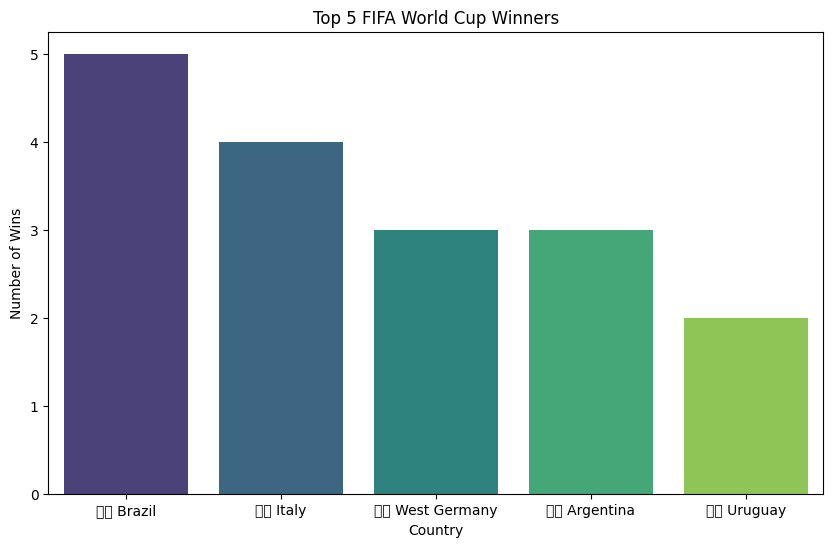

In [10]:
# Plot the top 5 winners
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_winners.index, y=top_5_winners.values, palette='viridis')
plt.title('Top 5 FIFA World Cup Winners')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.show()

Step 6: Generate a Report

In [11]:

# Summarize the findings in a report.

# Generate a report
report = f"""
Analysis Report:
- The dataset contains {len(df)} FIFA World Cup tournaments.
- The top 5 countries with the most wins are:
{top_5_winners.to_string()}
"""

print(report)

# %% [markdown]



Analysis Report:
- The dataset contains 22 FIFA World Cup tournaments.
- The top 5 countries with the most wins are:
Winner
🇧🇷 Brazil          5
🇮🇹 Italy           4
🇩🇪 West Germany    3
🇦🇷 Argentina       3
🇺🇾 Uruguay         2



**Q1: Find teams that participated but never reached the final**




In [12]:
# Step 1: Extract all participating teams
all_participating_teams = set()
for teams in df['Teams Participated']:
    all_participating_teams.update(teams)

# Step 2: Extract all teams that reached the final (winners and losers)
final_teams = set(df['Winner']).union(set(df['Loser']))

# Step 3: Find teams that participated but never reached the final
participated_but_never_reached_final = all_participating_teams - final_teams

# Display the result
print("Teams that participated but never reached the final:")
participated_but_never_reached_final

Teams that participated but never reached the final:


{'🇦🇪 United Arab Emirates',
 '🇦🇹 Austria',
 '🇧🇪 Belgium',
 '🇧🇴 Bolivia',
 '🇨🇭 Switzerland',
 '🇨🇮 Ivory Coast',
 '🇨🇱 Chile',
 '🇨🇲 Cameroon',
 '🇨🇴 Colombia',
 '🇨🇷 Costa Rica',
 '🇩🇿 Algeria',
 '🇪🇨 Ecuador',
 '🇪🇬 Egypt',
 '🇬🇭 Ghana',
 '🇬🇷 Greece',
 '🇭🇳 Honduras',
 '🇮🇷 Iran',
 '🇮🇸 Iceland',
 '🇯🇵 Japan',
 '🇰🇷 South Korea',
 '🇲🇦 Morocco',
 '🇲🇽 Mexico',
 '🇳🇬 Nigeria',
 '🇵🇦 Panama',
 '🇵🇪 Peru',
 '🇵🇱 Poland',
 '🇵🇹 Portugal',
 '🇵🇾 Paraguay',
 '🇶🇦 Qatar',
 '🇷🇴 Romania',
 '🇷🇸 Serbia',
 '🇷🇸 Yugoslavia',
 '🇷🇺 Russia',
 '🇷🇺 Soviet Union',
 '🇸🇦 Saudi Arabia',
 '🇸🇮 Slovenia',
 '🇸🇰 Slovakia',
 '🇸🇳 Senegal',
 '🇹🇳 Tunisia',
 '🇹🇷 Turkey',
 '🇹🇹 Trinidad and Tobago',
 '🇺🇦 Ukraine',
 '🇺🇸 United States',
 '🇿🇦 South Africa',
 '🏳️ Angola',
 '🏳️ Australia',
 '🏳️ Bosnia and Herzegovina',
 '🏳️ Bulgaria',
 '🏳️ Canada',
 '🏳️ China',
 '🏳️ Cuba',
 '🏳️ Czech Republic',
 "🏳️ Côte d'Ivoire",
 '🏳️ Denmark',
 '🏳️ Dutch East Indies',
 '🏳️ East Germany',
 '🏳️ El Salvador',
 '🏳️ Haiti',
 '🏳️ Iraq',
 '🏳️ Ireland',
 '🏳️ Israel',


Q2. Find teams that participated but never won

In [13]:
# Step 1: Extract all participating teams
all_participating_teams = set()
for teams in df['Teams Participated']:
    all_participating_teams.update(teams)

# Step 2: Extract all winning teams
winning_teams = set(df['Winner'])

# Step 3: Find teams that participated but never won
participated_but_never_won = all_participating_teams - winning_teams

# Display the result
print("Teams that participated but never won:")
print(participated_but_never_won)

Teams that participated but never won:
{'🇨🇴 Colombia', '🇵🇦 Panama', '🇨🇷 Costa Rica', '🇺🇸 United States', '🏳️ Jamaica', '🇶🇦 Qatar', '🏳️ Australia', '🏳️ Iraq', '🏳️ Togo', '🇷🇺 Russia', '🏳️ Israel', '🇹🇹 Trinidad and Tobago', '🏳️ China', '🇦🇹 Austria', '🇨🇱 Chile', '🇸🇮 Slovenia', '🇵🇾 Paraguay', '🇨🇿 Czechoslovakia', '🇯🇵 Japan', '🇷🇸 Yugoslavia', '🏳️ Bulgaria', '🇧🇴 Bolivia', '🇵🇪 Peru', '🏴\U000e0067\U000e0062\U000e0073\U000e0063\U000e0074\U000e007f Scotland', '🇸🇳 Senegal', '🇸🇪 Sweden', '🇳🇬 Nigeria', '🏳️ El Salvador', '🇭🇳 Honduras', '🇷🇴 Romania', '🏳️ Northern Ireland', '🇪🇨 Ecuador', '🇿🇦 South Africa', '🇮🇸 Iceland', '🇷🇸 Serbia', '🏳️ Czech Republic', '🏳️ Angola', '🇹🇷 Turkey', '🏳️ Norway', '🇨🇮 Ivory Coast', '🇨🇲 Cameroon', '🇬🇭 Ghana', '🏳️ Ireland', '🇪🇬 Egypt', '🏳️ Serbia and Montenegro', '🏳️ North Korea', '🏳️ New Zealand', '🏳️ Haiti', "🏳️ Côte d'Ivoire", '🇲🇦 Morocco', '🏳️ Denmark', '🏳️ Dutch East Indies', '🏳️ Bosnia and Herzegovina', '🇸🇦 Saudi Arabia', '🇮🇷 Iran', '🇰🇷 South Korea', '🇳🇱 Netherlands', '🏳

 **Conclusion**

---


This analysis identifies the top 5 countries with the most FIFA World Cup wins, with flags added to country names in all relevant columns, including `Venue Country`.